In [108]:
import spacy

In [109]:
nlp=spacy.load('en')

In [33]:
##reading texts
doc=nlp("spacy is cool")

In [5]:
doc

spacy is cool

to read file

In [6]:
myfile=open("D:\\RESEARCH PROJECT\\text classification\\20news-bydate-train\\comp.sys.mac.hardware\\50418").read()

In [7]:
doc_file=nlp(myfile)

In [8]:
doc_file

From: xor@clotho.acm.rpi.edu (Joe Schwartz)
Subject: Re: NUTEK FACES APPLE'S WRATH (article!!!!!!) READ
Article-I.D.: rpi.j3g5bwq
Organization: MapInfo Corporation, Troy, NY
Lines: 28
Nntp-Posting-Host: acm.rpi.edu

In article <davea-120493231310@129.228.20.182> davea@xetron.com (David P. Alverson) writes:
>I believe Apple has a patent on the region features of QuickDraw.  A mac
>clone would have to implement regions.  This is why Apple's comment was
>that
>they believe it is not possible to make a Mac clone without infringing
>on their patents.  They may have other patents like this.

Apple has patented their implementation of regions, which presumably
includes the internal data structure (which has never been officially
documented by Apple).  Apple cannot patent the concept of a region.

I'm guessing that either NuTek reverse-engineered Apple's internal data
structure for regions (I dunno if this would hold up in court), or they
came up with their own data structure.  If it's the lat

In [10]:
##sent tokenize

In [11]:
for num,sentence in enumerate(doc_file.sents):
    print(f'{num}:{sentence}')

0:From: xor@clotho.acm.rpi.edu
1:(Joe Schwartz)
Subject:
2:Re: NUTEK FACES APPLE'S
3:WRATH (article!!!!!!)
4:READ
Article-I.D.:
5:rpi.j3g5bwq
Organization:
6:MapInfo Corporation, Troy, NY
Lines: 28

7:Nntp-Posting-Host: acm.rpi.edu


8:In article
9:<davea-120493231310@129.228.20.182
10:> davea@xetron.com
11:(David P. Alverson) writes:

12:>
13:I believe Apple has a patent on the region features of QuickDraw.  
14:A mac

15:>clone would have to implement regions.  
16:This is why Apple's comment was
>that
>they believe it is not possible to make a Mac clone without infringing
>on their patents.  
17:They may have other patents like this.


18:Apple has patented their implementation of regions, which presumably
includes the internal data structure (which has never been officially
documented by Apple).  
19:Apple cannot patent the concept of a region.


20:I'm guessing that either NuTek reverse-engineered Apple's internal data
structure for regions (I dunno if this would hold up in court)

tokenises based on punctuations

In [12]:
doc

spacy is cool

In [15]:
##word tokens
for token in doc:
    print(token.text)

spacy
is
cool


In [17]:
##List of word tokens
[token.text for token in doc]

['spacy', 'is', 'cool']

In [18]:
##similiar to splitting on spaces
doc.text.split(" ")

['spacy', 'is', 'cool']

In [21]:
##word shape
for word in doc:
    print(word.text,word.shape)

spacy 13110060611322374290
is 4370460163704169311
cool 13110060611322374290


In [22]:
ex_doc=nlp("helllo HELLO HeLlo")

In [24]:
for word in ex_doc:
    print("token+>",word.text,"shape",word.shape_,word.is_alpha,word.is_stop)

token+> helllo shape xxxx True False
token+> HELLO shape XXXX True False
token+> HeLlo shape XxXxx True False


shape shows lowercase or upper case
similary there are .is_aplha,is_stop

# part of speech tagging

In [34]:
ex=nlp("he drinks a drink")

In [37]:
for word in ex:
    print(word.text,word.pos_)

he PRON
drinks VERB
a DET
drink NOUN


In [38]:
ex2=nlp("i fish a fish")

In [41]:
for word in ex2:
    print(word.text,word.pos_,word.tag_)

i PRON PRP
fish VERB VBP
a DET DT
fish NOUN NN


In [42]:
spacy.explain('DT')

'determiner'

In [45]:
spacy.explain('VBN')

'verb, past participle'

In [46]:
spacy.explain('VBD')

'verb, past tense'

In [43]:
exercise=nlp(u"All the faith he had had had had had no effect on the outome of his life")

In [44]:
for word in exercise:
    print((word.text,word.tag_,word.pos_))
    

('All', 'PDT', 'DET')
('the', 'DT', 'DET')
('faith', 'NN', 'NOUN')
('he', 'PRP', 'PRON')
('had', 'VBD', 'VERB')
('had', 'VBN', 'VERB')
('had', 'VBN', 'VERB')
('had', 'VBN', 'VERB')
('had', 'VBN', 'VERB')
('no', 'DT', 'DET')
('effect', 'NN', 'NOUN')
('on', 'IN', 'ADP')
('the', 'DT', 'DET')
('outome', 'NN', 'NOUN')
('of', 'IN', 'ADP')
('his', 'PRP$', 'DET')
('life', 'NN', 'NOUN')


see the tagging in all the 'had'

In [47]:
exe2=nlp("the man the professor the student has studies Rome.")

In [48]:
for word in exe2:
    print((word.text,word.tag_,word.pos_))

('the', 'DT', 'DET')
('man', 'NN', 'NOUN')
('the', 'DT', 'DET')
('professor', 'NN', 'NOUN')
('the', 'DT', 'DET')
('student', 'NN', 'NOUN')
('has', 'VBZ', 'VERB')
('studies', 'NNS', 'NOUN')
('Rome', 'NNP', 'PROPN')
('.', '.', 'PUNCT')


In [49]:
#syntaxical dependcies
ex3=nlp("sally likes sam")

In [50]:
for word in ex3:
    print((word.text,word.tag_,word.pos_,word.dep_))

('sally', 'RB', 'ADV', 'advmod')
('likes', 'VBZ', 'VERB', 'ROOT')
('sam', 'NN', 'NOUN', 'dobj')


In [53]:
spacy.explain('advmod')

'adverbial modifier'

In [57]:
spacy.explain('ROOT')

In [56]:
spacy.explain('dobj')

'direct object'

# visual dependecy

In [59]:
from spacy import displacy

In [61]:
displacy.render(ex3,style='dep')

# Lemmatizing
reducing a word to base/root form

In [62]:
import spacy

In [63]:
docx=nlp("study studying")

In [66]:
for word in docx:
    print(word.text,word.lemma_,word.pos_)

study study NOUN
studying study VERB


# Named Entity recognition
.ents
.label_

In [81]:
wikitext=nlp("By 2020 telecom company orange, will relocate from turkey to india")

In [87]:
for word in wikitext.ents:
    print(word.text)

2020


In [86]:
for word in exe2.ents:
    print(word.text,word.label_)

Rome GPE


In [84]:
spacy.explain('GPE')

'Countries, cities, states'

In [85]:
displacy.render(wikitext,style='ent')

# semantic similarity
-for recommendation systems
-data preprocessing eg removing duplicates

In [119]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [120]:
doc1=nlp("wolf")

In [121]:
doc2=nlp("dog")

In [122]:
doc1.similarity(doc2)

0.5206573188004238

closer to more similar

In [123]:
doc3=nlp("cat")

In [124]:
doc2.similarity(doc3)

0.8016854705531046

In [117]:
doc4=nlp("clever")
doc5=nlp("smart")

In [127]:
doc5.similarity(doc4)

0.6583482458106189

In [151]:
ex1=nlp("wolf dog cat bird fish")

In [130]:
for token1 in ex1:
    for token2 in ex1:
        print((token1.text,token2.text),"similarity=>",token1.similarity(token2))

('wold', 'wold') similarity=> 1.0
('wold', 'dog') similarity=> 0.18086264
('wold', 'cat') similarity=> 0.15850338
('wold', 'bird') similarity=> 0.21643913
('wold', 'fish') similarity=> 0.13543019
('dog', 'wold') similarity=> 0.18086264
('dog', 'dog') similarity=> 1.0
('dog', 'cat') similarity=> 0.80168545
('dog', 'bird') similarity=> 0.47875515
('dog', 'fish') similarity=> 0.40854338
('cat', 'wold') similarity=> 0.15850338
('cat', 'dog') similarity=> 0.80168545
('cat', 'cat') similarity=> 1.0
('cat', 'bird') similarity=> 0.5236873
('cat', 'fish') similarity=> 0.4180654
('bird', 'wold') similarity=> 0.21643913
('bird', 'dog') similarity=> 0.47875515
('bird', 'cat') similarity=> 0.5236873
('bird', 'bird') similarity=> 1.0
('bird', 'fish') similarity=> 0.5582421
('fish', 'wold') similarity=> 0.13543019
('fish', 'dog') similarity=> 0.40854338
('fish', 'cat') similarity=> 0.4180654
('fish', 'bird') similarity=> 0.5582421
('fish', 'fish') similarity=> 1.0


In [152]:
mylist=[(token1.text,token2.text,token1.similarity(token2)) for token2 in ex1 for token1 in ex1]

In [153]:
mylist

[('wolf', 'wolf', 1.0),
 ('dog', 'wolf', 0.5206573),
 ('cat', 'wolf', 0.5081626),
 ('bird', 'wolf', 0.49714813),
 ('fish', 'wolf', 0.36875135),
 ('wolf', 'dog', 0.5206573),
 ('dog', 'dog', 1.0),
 ('cat', 'dog', 0.80168545),
 ('bird', 'dog', 0.47875515),
 ('fish', 'dog', 0.40854338),
 ('wolf', 'cat', 0.5081626),
 ('dog', 'cat', 0.80168545),
 ('cat', 'cat', 1.0),
 ('bird', 'cat', 0.5236873),
 ('fish', 'cat', 0.4180654),
 ('wolf', 'bird', 0.49714813),
 ('dog', 'bird', 0.47875515),
 ('cat', 'bird', 0.5236873),
 ('bird', 'bird', 1.0),
 ('fish', 'bird', 0.5582421),
 ('wolf', 'fish', 0.36875135),
 ('dog', 'fish', 0.40854338),
 ('cat', 'fish', 0.4180654),
 ('bird', 'fish', 0.5582421),
 ('fish', 'fish', 1.0)]

In [154]:
import pandas as pd

In [155]:
df=pd.DataFrame(mylist,columns=['token1','token2','similarity'])

In [156]:
df

,token1,token2,similarity
0,wolf,wolf,1.000000
1,dog,wolf,0.520657
2,cat,wolf,0.508163
3,bird,wolf,0.497148
4,fish,wolf,0.368751
5,wolf,dog,0.520657
6,dog,dog,1.000000
7,cat,dog,0.801685
8,bird,dog,0.478755
9,fish,dog,0.408543


In [157]:
df_viz=df.replace({'wolf':0,'dog':1,'cat':2,'bird':3,'fish':4})

In [158]:
import matplotlib.pyplot as plt

In [159]:
import seaborn as sns
%matplotlib inline

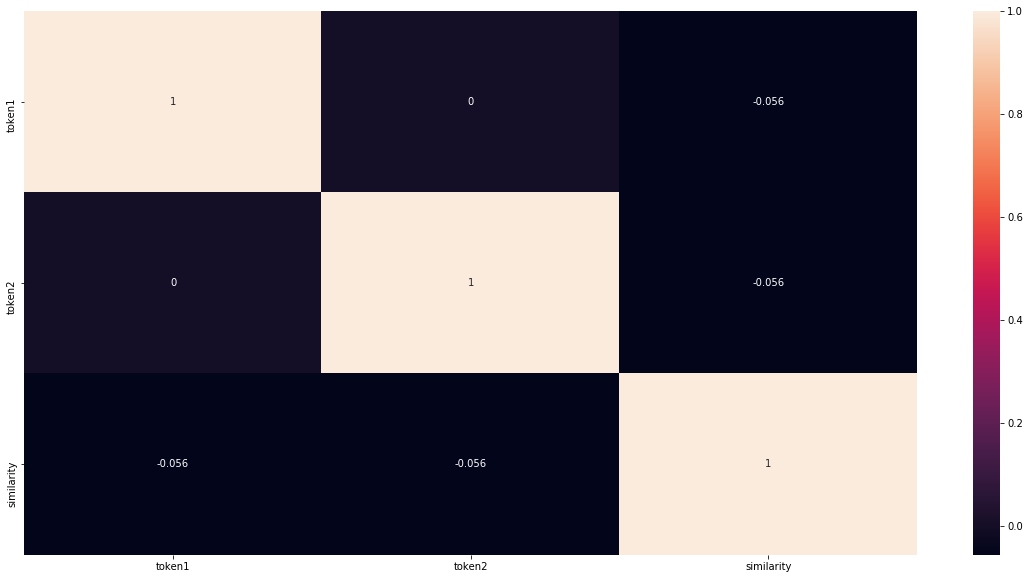

In [160]:
plt.figure(figsize=(20,10))
sns.heatmap(df_viz.corr(),annot=True)
plt.show()

In [162]:
df_viz.head(5)

,token1,token2,similarity
0,0,0,1.000000
1,1,0,0.520657
2,2,0,0.508163
3,3,0,0.497148
4,4,0,0.368751


In [165]:
##stopwords
#reduces features makes ML faster

In [166]:
from spacy.lang.en.stop_words import STOP_WORDS

In [167]:
print(STOP_WORDS)

{"'d", 'using', 'whoever', 'to', 'within', 'anyone', 'into', 'thereafter', 'am', 'eight', 'nevertheless', 'onto', 'would', 'n’t', 'whole', 'thru', 'indeed', 'beforehand', 'in', 'whom', 'due', 'became', 'where', 'is', 'done', 'full', 'wherever', 'sometimes', 'here', 'across', 'amongst', 'they', 'part', 'unless', 'or', 'too', 'mostly', "'s", '’m', 'sometime', 'besides', 'already', "'re", 'such', 'either', 'always', '‘m', 'beside', 'between', 'so', 'otherwise', 'own', 'put', 'noone', 'other', 'herein', 'meanwhile', 'her', "'ve", 'formerly', 'should', 'ever', '‘ll', 'also', 'an', 'did', 'least', 'and', 'around', 'others', 'most', 'until', 'used', 'move', 'behind', 'nothing', 'out', 'further', 'him', 'being', 'at', 'it', 'name', 'under', 'now', 'can', '’ll', 'from', 'seeming', 'your', 'rather', 'something', 'then', 'seemed', 'much', 'per', 'of', 're', 'this', 'eleven', 'though', 'no', 'empty', 'often', 'somewhere', 'yours', 'else', 'could', 'ca', 'has', 'next', "n't", 'namely', 'i', "'ll", 

In [168]:
nlp.vocab["Theme"].is_stop

False

In [170]:
mysent=nlp(u"this sentences is about how to use stop words")

In [172]:
for word in mysent:
    if word.is_stop==True:
        print(word)

this
is
about
how
to


In [178]:
for word in mysent:
    if word.is_stop==False:
        print(word)

sentences
use
stop
words


In [173]:
##to add stop words

In [183]:
STOP_WORDS.add("aa")

In [184]:
nlp.vocab["aa"].is_stop### not working in large model

True

# Noun chunks

In [182]:
nlp=spacy.load('en')

In [185]:
docx=nlp(u"the man reading the news is very tall")

In [186]:
for token in docx.noun_chunks:
    print(token.text)

the man
the news


In [187]:
##Root text
for token in docx.noun_chunks:
    print(token.root.text)

man
news


In [188]:
for token in docx.noun_chunks:
    print(token.root.text,"connector_text:",token.root.head.text)

man connector_text: is
news connector_text: reading


# Senetence Segmentation Boundary detection

In [194]:
nlp=spacy.load('en')

In [195]:
def mycustom_boundary(docx):
    if token.text == '--':
        docx[token,i+1].is_Sent_start==True
    return docx    
        

In [197]:
nlp.add_pipe(mycustom_boundary,before='parser')

In [203]:
mysentence=nlp(u"This is my first sentence--the last comment was xoxo--goood morning--hello")

In [204]:
for sent in mysentence.sents:
    print(sent)

This is my first sentence--the last comment was xoxo--goood morning--hello


In [205]:
##custom Rule based

In [208]:
##see documenatio